In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns
sns.set()

In [77]:
data = pd.read_csv("./1.02.+Multiple+linear+regression.csv")
data

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [78]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [79]:
y = data["GPA"]
x = data[["SAT","Rand 1,2,3"]]
x

,SAT,"Rand 1,2,3"
0,1714,1
1,1664,3
2,1760,3
3,1685,3
4,1693,2
...,...,...
79,1936,3
80,1810,1
81,1987,3
82,1962,1


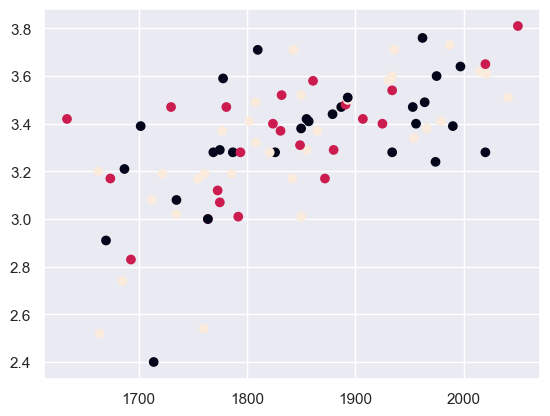

In [80]:
#plt.scatter(x1["Rand 1,2,3"],y)
plt.scatter(x["SAT"],y, c= x["Rand 1,2,3"])
plt.show()

In [81]:
reg = LinearRegression().fit(x,y)
# This is to get R Squared
reg.score(x,y)

0.4066811952814282

In [82]:
# This is to get Coef of the feature
reg.coef_

array([ 0.00165354, -0.00826982])

In [83]:
# This is to get intercept
reg.intercept_

0.29603261264909575

In [84]:
pred_data =  pd.DataFrame([3000, 3200, 3500], columns=['SAT'])
pred_data["Rand 1,2,3"] = [1,2,3]
predicted_y = reg.predict(pred_data)
pred_data

,SAT,"Rand 1,2,3"
0,3000,1
1,3200,2
2,3500,3


In [85]:
#pred_data_out = pd.DataFrame()
pred_data_out = pred_data.copy()
pred_data_out["Predicted GPA"] = predicted_y

In [86]:
pred_data

,SAT,"Rand 1,2,3"
0,3000,1
1,3200,2
2,3500,3


In [87]:
scalar = preprocessing.StandardScaler()
scalar.fit(x,y)
x_scaled = scalar.transform(x)
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

In [88]:
pd.DataFrame(x_scaled).describe()

,0,1
count,8.400000e+01,8.400000e+01
mean,-1.041495e-15,1.833851e-16
std,1.006006e+00,1.006006e+00
min,-2.033305e+00,-1.246371e+00
25%,-7.051892e-01,-1.246371e+00
50%,6.988878e-03,-7.002087e-02
75%,8.539034e-01,1.106330e+00
max,1.970291e+00,1.106330e+00


In [89]:
reg_scaled = LinearRegression().fit(x_scaled,y)
reg_scaled.coef_

array([ 0.17181389, -0.00703007])

In [90]:
reg_scaled.intercept_

3.330238095238095

In [96]:
pred_data_scaled = pred_data.copy()

In [98]:
predicted_y_scaled = reg_scaled.predict(scalar.transform(pred_data))
pred_data_scaled["Predicted GPA"] = predicted_y_scaled
pred_data_scaled

,SAT,"Rand 1,2,3",Predicted GPA
0,3000,1,5.248388
1,3200,2,5.570827
2,3500,3,6.058619
